In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # HISTOGRAMS
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df['total_bill'].max()

50.81

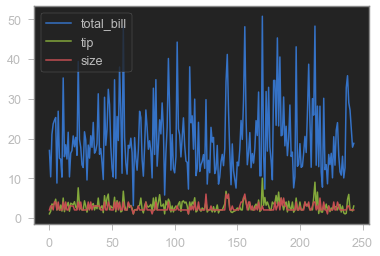

In [16]:
%matplotlib inline
df.plot()

**Настройка параметров метода**

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

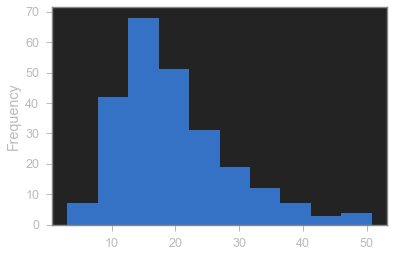

In [17]:
df['total_bill'].plot(kind = 'hist')

Добавление параметров grid и title дополнит отображаемую диаграмму несколькими деталями:

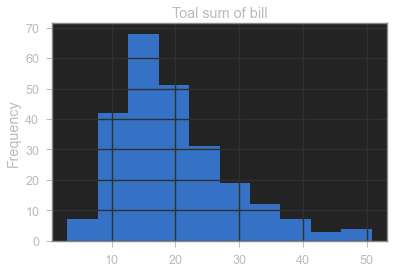

In [18]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Toal sum of bill')

Для работы с категориальными (нечисловыми) переменными с помощью метода plot датафрейм необходимо предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, нужно посчитать, сколько заказов пришлось на каждый из дней. Сделать это можно с помощью метода value_counts(), а уже к получившейся series применить метод plot. Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

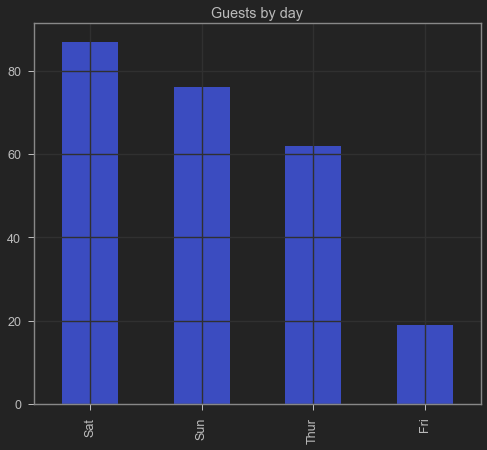

In [22]:
df['day'].value_counts().plot(kind = 'bar',grid = True, colormap = 'coolwarm', title = 'Guests by day')

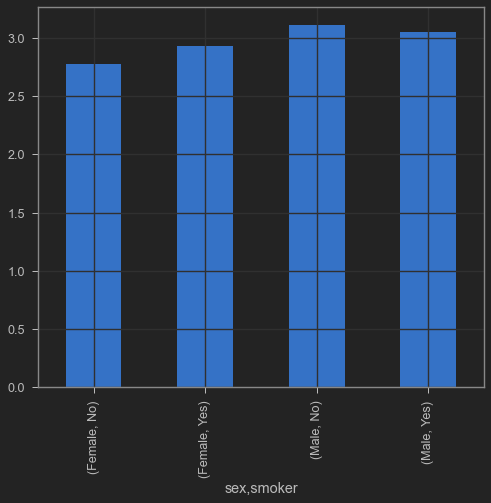

In [26]:
df.groupby(['sex','smoker'])['tip'].mean().plot(kind = 'bar', grid = True)

# 10.4. Отображение двух показателей на графике

Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234265F5910>,
      dtype=object)

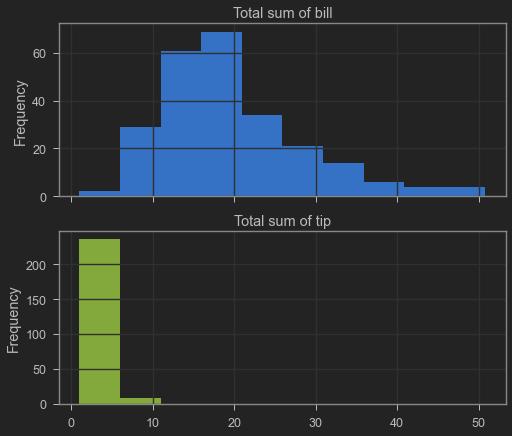

In [33]:
df[['total_bill','tip']].plot(kind = 'hist',
                             grid = True,
                             subplots = True,
                             title = ['Total sum of bill', 'Total sum of tip'],
                             legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

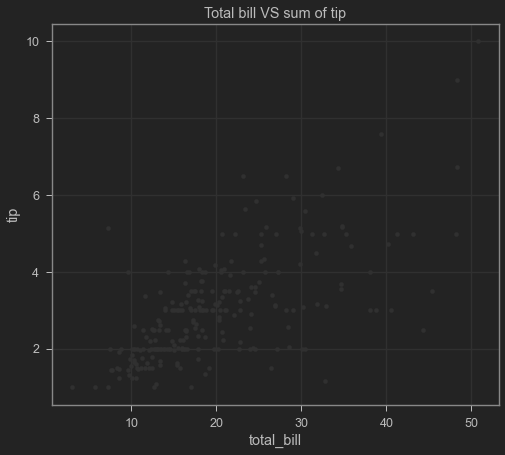

In [35]:
df.plot(x = 'total_bill',
       y = 'tip',
       kind = 'scatter',
       grid = True,
       title = 'Total bill VS sum of tip')

На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

*Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:*

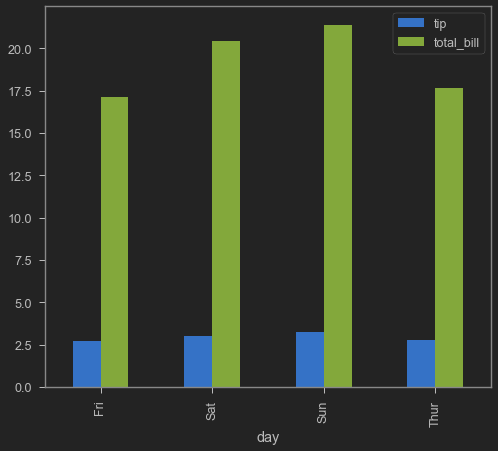

In [37]:
df.pivot_table(values=['total_bill','tip'],
              index = 'day',
              aggfunc='mean').plot(kind = 'bar')

# 10.5. Объектно-ориентированный подход

Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

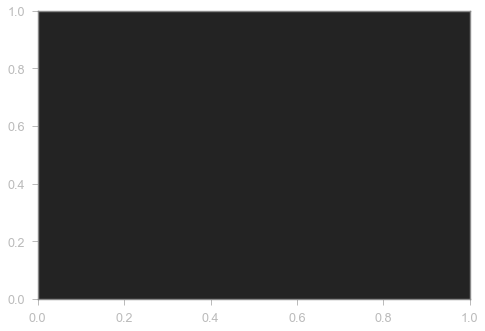

In [50]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

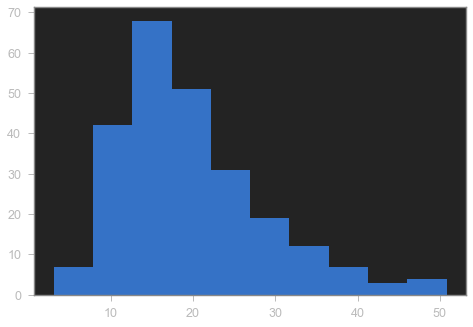

In [51]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:
axes.set_title — заголовок диаграммы;
axes.set_ylabel — заголовок для оси ординат;
axes.set_xlabel — заголовок для оси абсцисс.


Text(0.5, 0, 'Сумма заказа, USD')

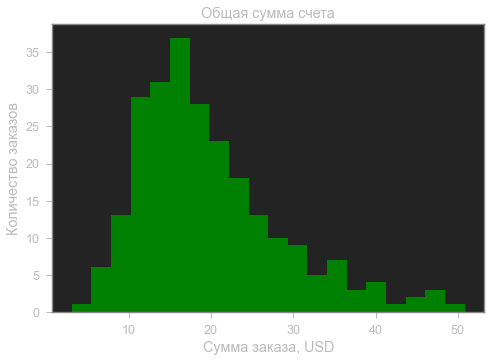

In [53]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(df['total_bill'],bins = 20,color= 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:
https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter

Text(0, 0.5, 'Размер чаевых')

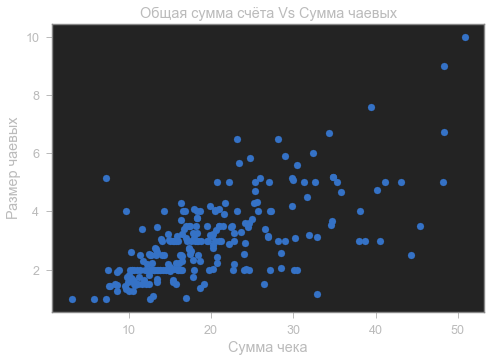

In [4]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

axes.scatter(x = df['total_bill'], y= df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

# 10.6. Несколько систем координат

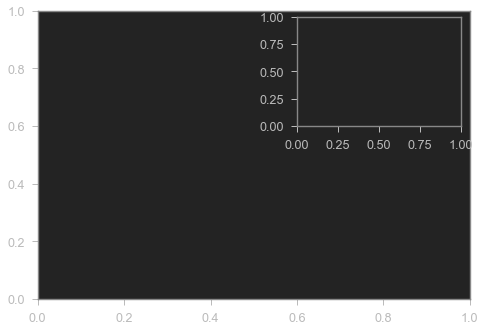

In [71]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])

In [5]:
bills_per_day = df.groupby(['day'])['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

к объекту main_axes применим метод hist;
для объекта insert_axes используем метод bar.

<BarContainer object of 4 artists>

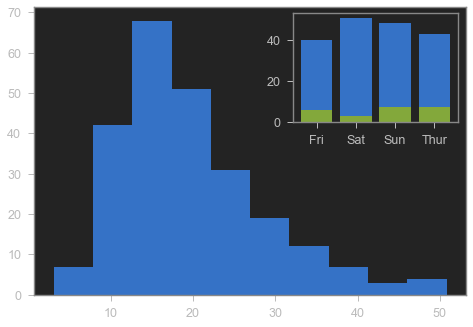

In [75]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])

insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar:

<BarContainer object of 4 artists>

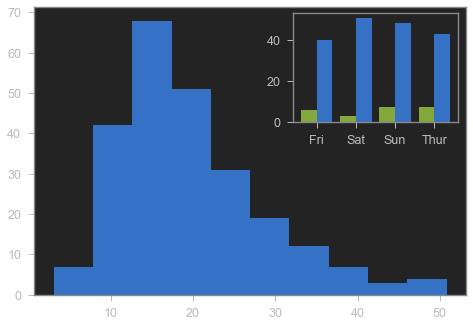

In [76]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],
               width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],
               width = -0.4, align = 'edge')


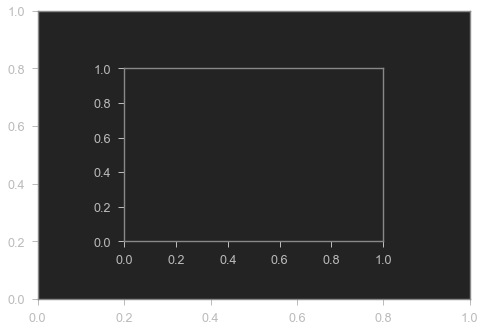

In [82]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

# 10.7. Добавление легенды

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html?highlight=legend#matplotlib.pyplot.legend

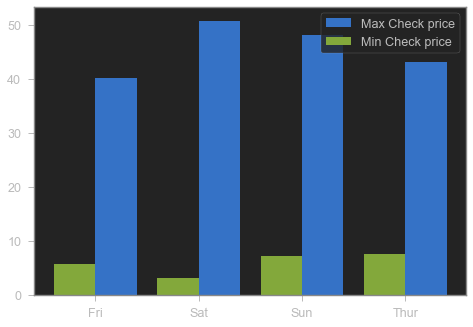

In [8]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(x = bills_per_day['day'],height = bills_per_day['max'],
        width = 0.4,align = 'edge',label='Max Check price')
axes.bar(x = bills_per_day['day'],height = bills_per_day['min'],
        width = -0.4,align = 'edge',label='Min Check price')
axes.legend(loc=1)


Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

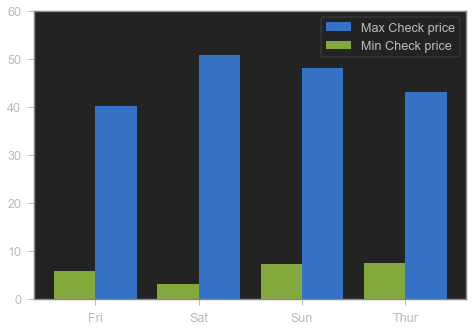

In [18]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_ylim(0,60)
axes.bar(x = bills_per_day['day'],height = bills_per_day['max'],
        width = 0.4,align = 'edge',label='Max Check price')
axes.bar(x = bills_per_day['day'],height = bills_per_day['min'],
        width = -0.4,align = 'edge',label='Min Check price')
axes.legend(loc=1) # Location of the Legend

# 10.8 Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

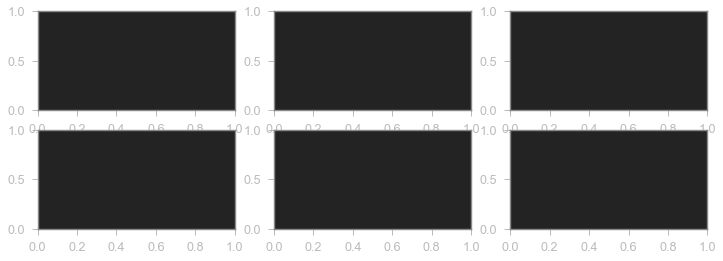

In [27]:
fig,axes = plt.subplots(2,3, figsize=(12,4))

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

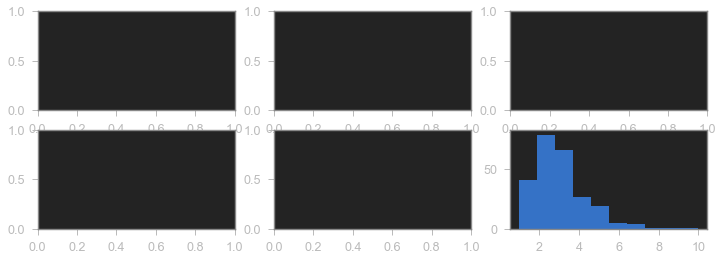

In [35]:
fig,axes = plt.subplots(2,3, figsize=(12,4))
axes[1][2].hist(df['tip'])

Text(0.5, 1.0, 'Bill Vs tips.csv')

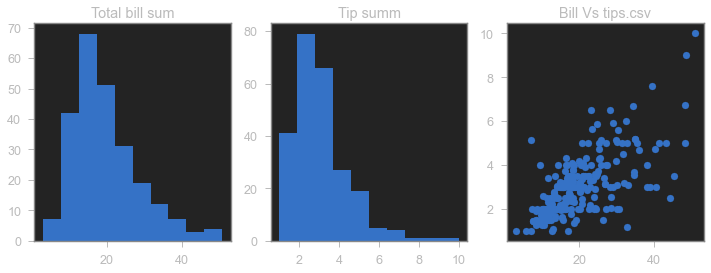

In [26]:
fig,axes = plt.subplots(1,3, figsize = (12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Total bill sum')

axes[1].hist(df['tip'])
axes[1].set_title('Tip summ')

axes[2].scatter(x = df['total_bill'], y= df['tip'], marker = 'o')
axes[2].set_title('Bill Vs tips.csv')

# 10.9. Создание линейных графиков

In [5]:
# Genereate an array
x = np.linspace(start=-3.,stop = 3., num=1000)
y1 = np.exp(x)

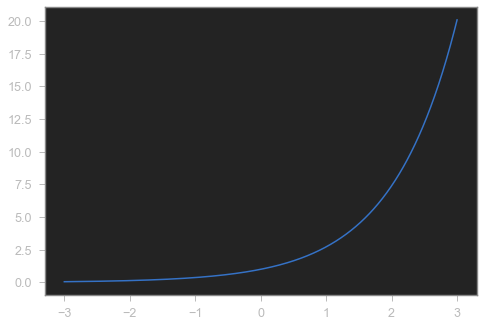

In [6]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x,y1)

Отрисовка нескольких кривых
Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка будет выполнена в том же matplotlib.pyplot.figure, который в данном случае создается автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

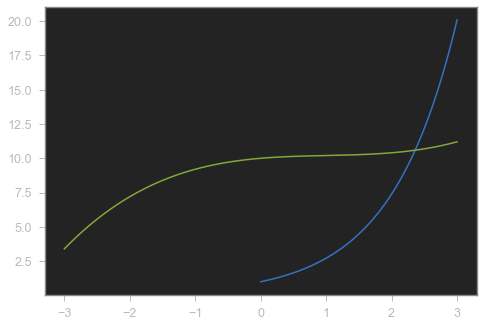

In [7]:
y2 = 10+0.4*x - 0.3*x**2+0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:],y1[500:])
axes.plot(x,y2)

При визуализации большого объема данных часто приходится выделять те или иные графики. Как и при написании текстов, это можно сделать с помощью форматирования. Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. Описание возможных стилей и маркеров можно посмотреть в документации.

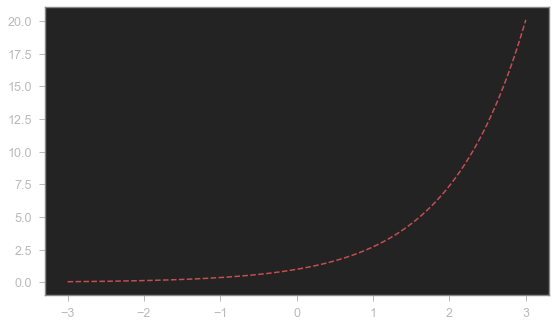

In [12]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1,'r--')

Цвета и маркеры
Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

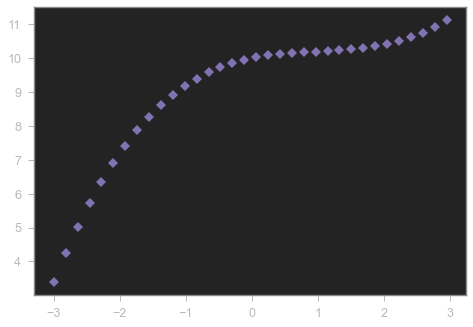

In [13]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

# 10.10. Гистограммы распределения признаков

In [29]:
df = pd.read_csv('tips.csv')

Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

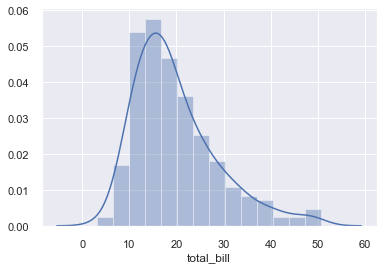

In [30]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

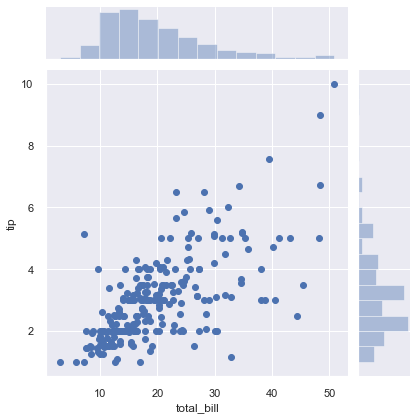

In [33]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

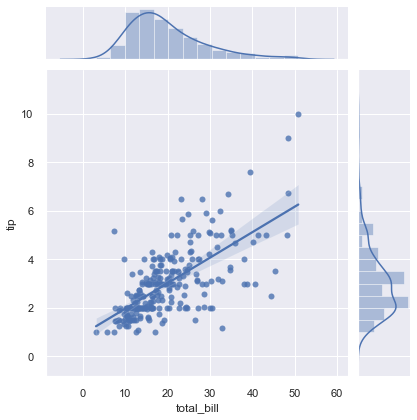

In [41]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot:

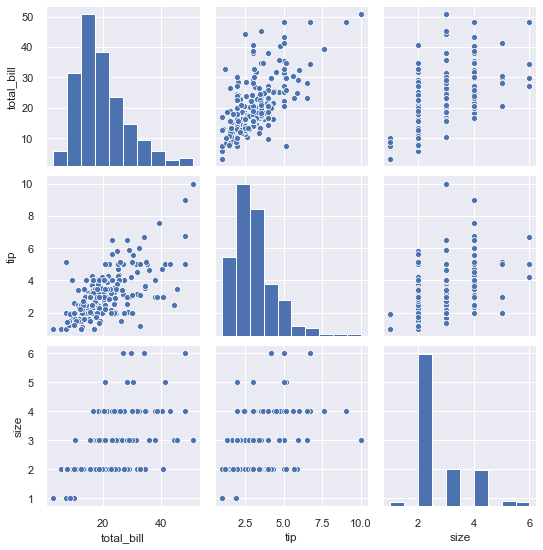

In [35]:
sns.pairplot(df)

# 10.11. Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

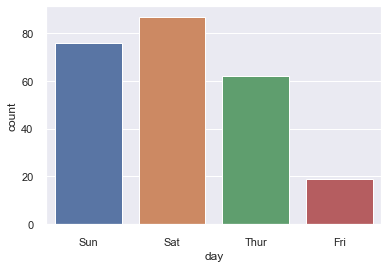

In [42]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

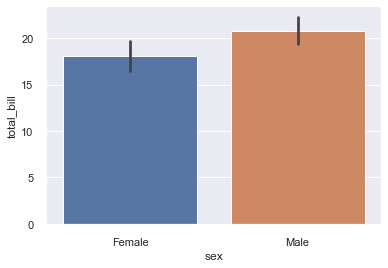

In [43]:
sns.barplot(x = 'sex', y = 'total_bill',data = df)

График показывает, что средний чек, оплаченный клиентами-мужчинами, немного больше, чем средний чек клиентов женского пола.

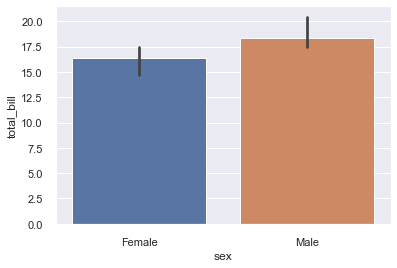

In [50]:
sns.barplot(x = 'sex', y = 'total_bill',data = df, estimator=np.median)

Boxplots
Box plot — тип графика, компонентами которого являются:

Отрезок (Range), отражающий диапазон значений набора данных.
Прямоугольник (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквартильный интервал) — ширина прямоугольника от Q1 до Q3.
Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

показывается, как менялась сумма чаевых в зависимости от дня недели:

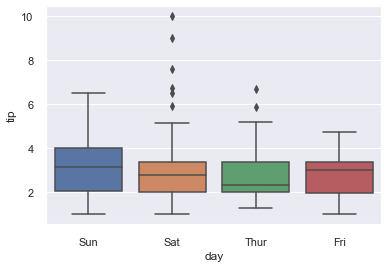

In [52]:
sns.boxplot(x = 'day', y = 'tip',data = df)

Ещё один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

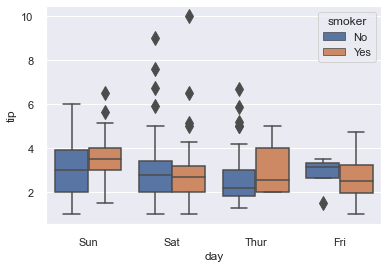

In [60]:
sns.boxplot(x = 'day', y = 'tip',data = df, hue='smoker',fliersize=10)

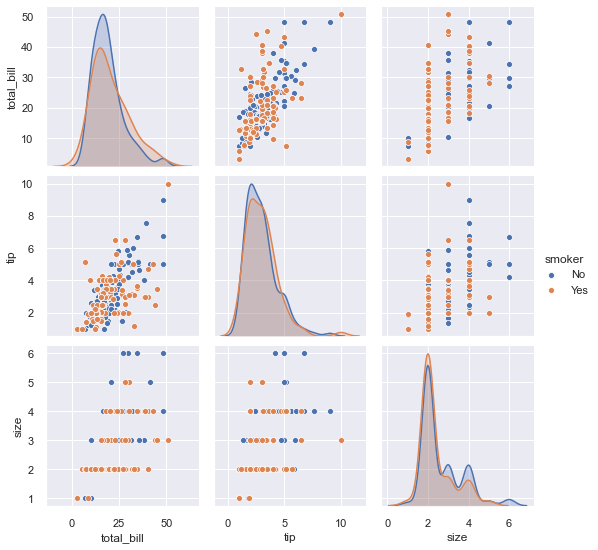

In [75]:
#Построение графиков, на каждом из которых разными цветами выделяются 
# данные о курящих и некурящих
sns.pairplot(df,hue='smoker')

# Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [79]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):

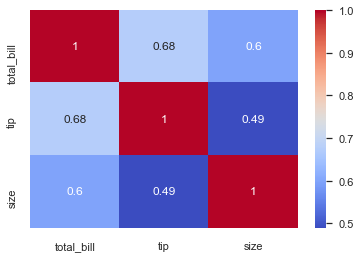

In [80]:
sns.heatmap(correlation,annot = True, cmap='coolwarm')

# 10.14. Основные типы графиков в Plotly

In [85]:
#Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:
init_notebook_mode(connected=True)
cf.go_offline()

In [86]:
df.iplot()

Функции графика, созданного методом iplot:

получение в интерактивном режиме значения признака в отдельных точках;
регулирование отображения конкретных признаков (отключение и включение данных признаков без изменения кода);
увеличение фрагмента графика;
сохранение полученного графика в формате png напрямую из jupyter notebook.
Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять тип и другие особенности диаграммы. Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами для разных заказов:

In [87]:
df[['total_bill','tip']].iplot(kind ='spread' )

C:\Users\wangshu202040\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

In [89]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip')

***Задания***

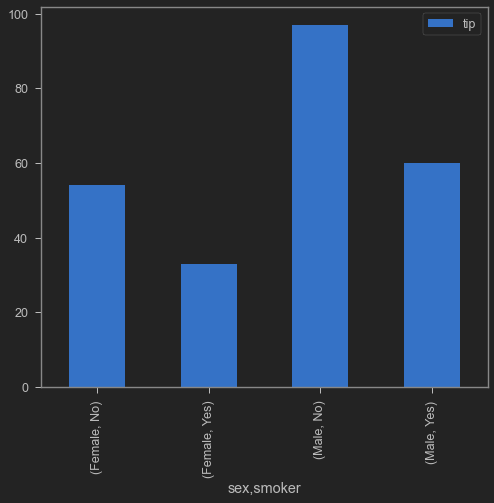

In [38]:
# Какой заголовок лучше подойдёт для диаграммы, созданной с помощью этого кода?
df.pivot_table(values='tip',index = ['sex','smoker'],aggfunc='count').plot(kind = 'bar')

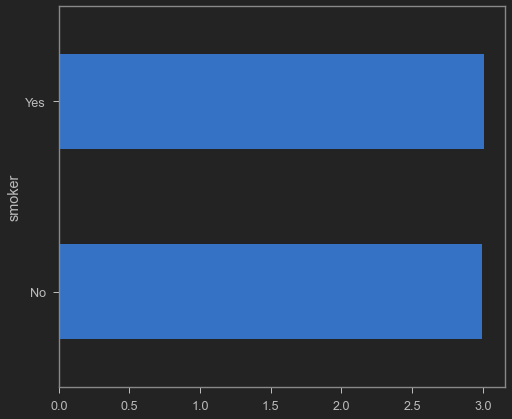

In [43]:
# Какой вариант кода лучше всего подходит для построения графика, отображающего среднюю сумму чаевых,
# которые оставляют курящие и некурящие посетители?
df.groupby('smoker')['tip'].mean().plot(kind = 'barh')

# Задания Объектно-ориентированный подход

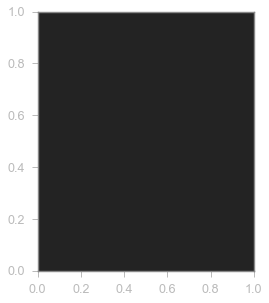

In [3]:
# Отметьте все варианты кода, в которых создаётся прямоугольная координатная плоскость с высотой больше ширины:
fig = plt.figure()
axes = fig.add_axes([0.2, 0.2, 0.5, 0.9])

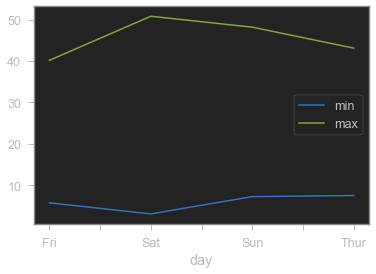

In [7]:
# Укажите код, который можно использовать для создания графика, показывающего 
# изменение минимальной и максимальной суммы счёта по дням недели.
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()

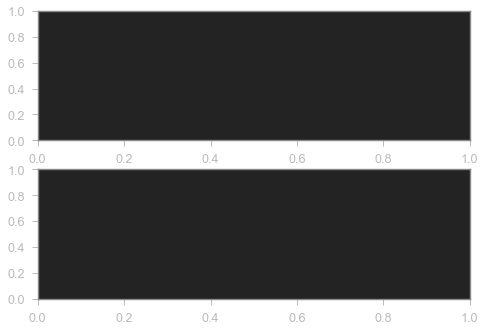

In [16]:
# Выберите параметры двух систем координат в Matplotlib, расположенных одна над другой.
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 0.45])
insert_axes = fig.add_axes([0, 0.55, 1, 0.45])